# Objective of this Notebook

1. Replay the trajectory
2. Are there any patterns where human pathways are particularly effective?

## Import Dependencies

In [1]:
# %matplotlib inline
# %matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
from human_aware_rl.static import *
import pickle as pkl

set_global_seed(1884)

In [2]:
import ast
import json

# Define Helper Functions

In [3]:
def json_eval(s):
    json_acceptable_string = s.replace("'", "\"")
    d = json.loads(json_acceptable_string)
    return d

# Import Cleaned Data

In [4]:
hh_all_2020_file = '/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/cleaned/2020_hh_trials_all.pickle'
hh_all_2019_file = '/Users/michellezhao/Documents/overcooked_research/human_aware_rl/human_aware_rl/static/human_data/cleaned/2019_hh_trials_all.pickle'






In [5]:
with open(hh_all_2020_file,'rb') as file:
    humans_2020_file = pkl.load(file)
    
with open(hh_all_2019_file,'rb') as file:
    humans_2019_file = pkl.load(file)



In [6]:
humans_2020_file.to_csv('humans_all_2020.csv')

In [7]:
humans_2019_file.to_csv('humans_all_2019.csv')

In [8]:
humans_2020_file.columns

Index(['state', 'joint_action', 'reward', 'time_left', 'score', 'time_elapsed',
       'cur_gameloop', 'layout', 'layout_name', 'trial_id', 'player_0_id',
       'player_1_id', 'player_0_is_human', 'player_1_is_human',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [9]:
old_trials = humans_2019_file
new_trials = humans_2020_file

In [10]:
all_trials = pd.concat([old_trials, new_trials])

In [11]:
all_trials.columns

Index(['Unnamed: 0', 'cur_gameloop', 'joint_action', 'layout', 'layout_name',
       'reward', 'score', 'state', 'time_elapsed', 'time_left', 'trial_id',
       'player_0_is_human', 'player_1_is_human', 'player_0_id', 'player_1_id',
       'cur_gameloop_total', 'score_total', 'button_press',
       'button_press_total', 'timesteps_since_interact',
       'button_presses_per_timstep'],
      dtype='object')

In [12]:
len(all_trials['trial_id'].unique())

373

# Process New Trials

# Plot Layout

In [13]:
old_trials['layout_name'].unique()

array(['cramped_room', 'asymmetric_advantages', 'coordination_ring',
       'random3', 'random0'], dtype=object)

In [14]:
# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])


In [15]:
layout = eval(old_trials[old_trials['layout_name']=='random3']['layout'].to_numpy()[0])


In [16]:
layout = np.array(layout)

In [17]:
layout = np.array([list(elem) for elem in layout])

<IPython.core.display.Javascript object>


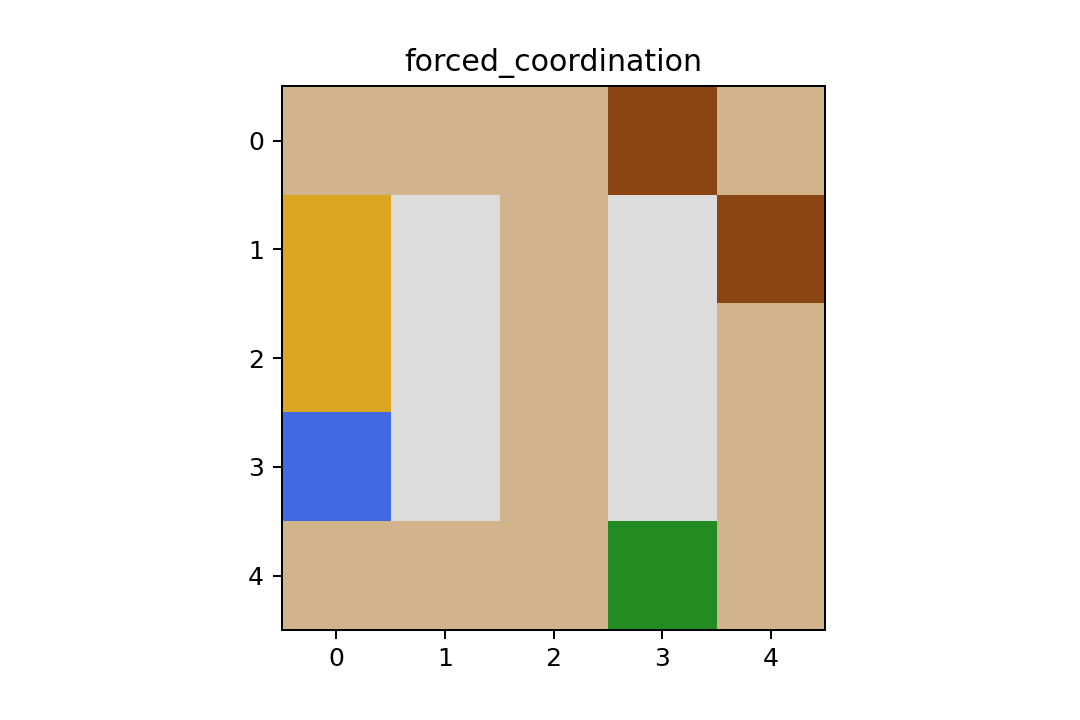

In [18]:
layout_names = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
       'random3', 'random0']
layout_titles = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
       'counter_circuit', 'forced_coordination']


#     layout = np.array(layout)
# print(layout)

def display_layout(layout, title):
    grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
    for i in range(layout.shape[0]):
        for j in range(layout.shape[1]):
            # Floor = gray
            grid_display[i,j,:] = [220,220,220]
            if layout[i,j] == 'X':
                # Counter = Tan
                grid_display[i,j,:] = [210,180,140]
            if layout[i,j] == 'P':
                # Pots = brown
                grid_display[i,j,:] = [139,69,19]
            if layout[i,j] == 'S':
                # Serve = Green
                grid_display[i,j,:] = [34,139,34]
            if layout[i,j] == 'O':
                # Onion = Yellow
                grid_display[i,j,:] = [218,165,32]
            if layout[i,j] == 'D':
                # Dishes = Blue
                grid_display[i,j,:] = [65,105,225]
            if layout[i,j] == 'T':
                # Tomato = Blue
                grid_display[i,j,:] = [255,69,0]
                
    plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)
    plt.title(title)
    plt.show()
                
for i in range(len(layout_names)):
    name = layout_names[i]
    title = layout_titles[i]
    layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
    layout = np.array([list(elem) for elem in layout])
    display_layout(layout, title)
    

# Replay Trajectories

In [19]:
layout_trials = old_trials[old_trials['layout_name']=='cramped_room']['trial_id'].unique()

# for j in range(len(layout_trials)):
for j in [0]:
    trial_id = layout_trials[j]
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
    

<IPython.core.display.Javascript object>


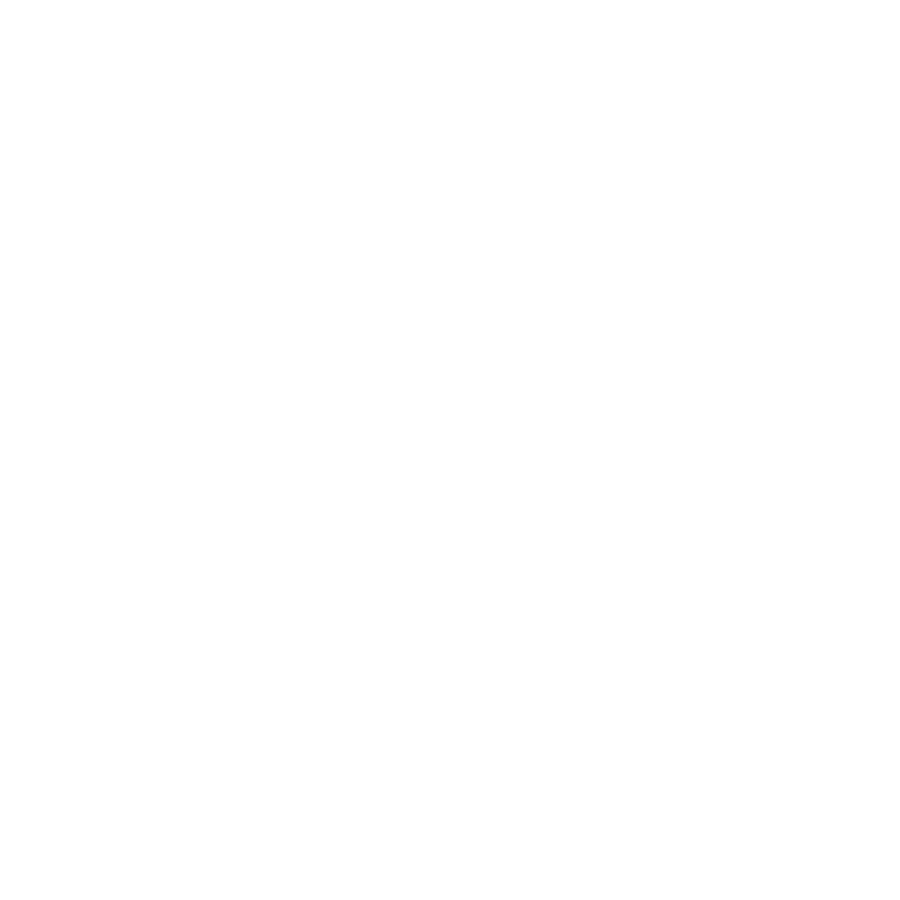

In [20]:
plt.figure(figsize=(5,5))

plt.plot([elem['position'][0] for elem in p1_data], [elem['position'][1] for elem in p1_data], c='r')
plt.plot([elem['position'][0] for elem in p2_data], [elem['position'][1] for elem in p2_data], c='b')
plt.show()

In [21]:
layout_trials = old_trials[old_trials['layout_name']=='cramped_room']['trial_id'].unique()

# for j in range(len(layout_trials)):
for j in [1]:
    trial_id = layout_trials[j]
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
    
N_steps = len(p1_data)
a_min = 1    # the minimial value of the paramater a
a_max = N_steps-1   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

t = np.linspace(0, N_steps-1, N_steps)

In [22]:
layout.shape

(5, 5)

<IPython.core.display.Javascript object>


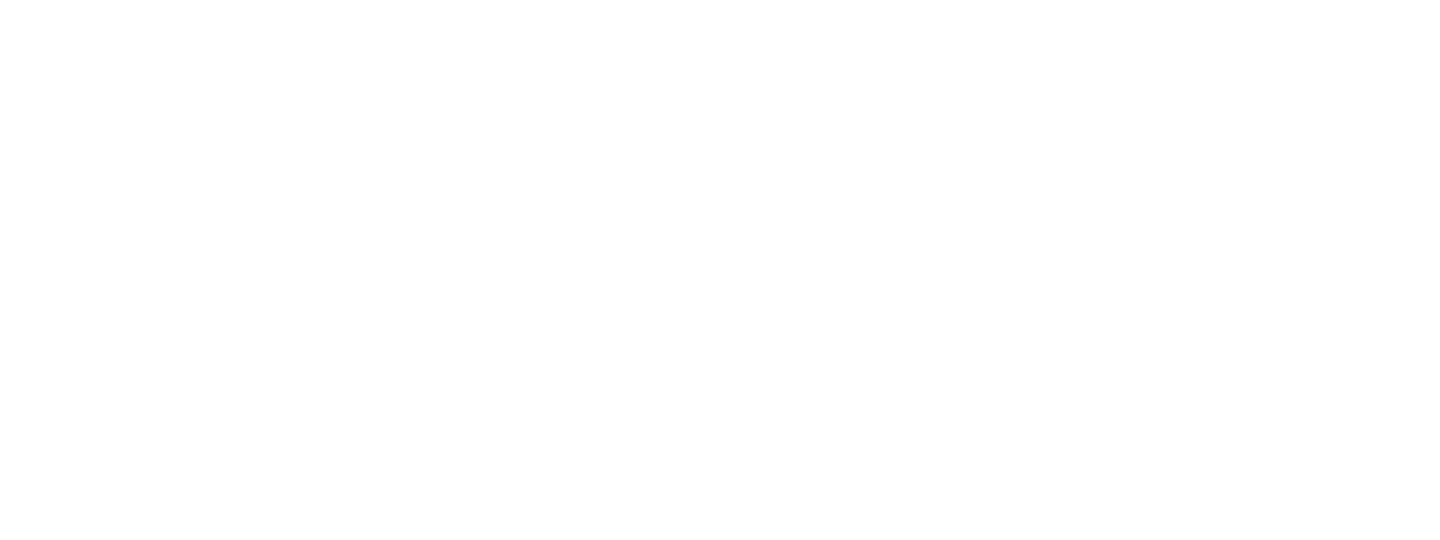

In [23]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi

def f_p1(t, a):
    t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return [p1_data[int(j)]['position'][0] for j in t_partial], [p1_data[int(j)]['position'][1] for j in t_partial]
def f_p2(t, a):
    t_partial = t[int(a)-1:int(a)+1]
    return [p2_data[int(j)]['position'][0] for j in t_partial], [p2_data[int(j)]['position'][1] for j in t_partial]


a_min = 1    # the minimial value of the paramater a
a_max = N_steps-1   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

t = np.linspace(0, N_steps-1, N_steps)

fig = plt.figure(figsize=(8,3))
name = 'cramped_room'
title = 'Cramped Room'
layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
layout = np.array([list(elem) for elem in layout])
grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
for i in range(layout.shape[0]):
    for j in range(layout.shape[1]):
        # Floor = gray
        grid_display[i,j,:] = [220,220,220]
        if layout[i,j] == 'X':
            # Counter = Tan
            grid_display[i,j,:] = [210,180,140]
        if layout[i,j] == 'P':
            # Pots = brown
            grid_display[i,j,:] = [139,69,19]
        if layout[i,j] == 'S':
            # Serve = Green
            grid_display[i,j,:] = [34,139,34]
        if layout[i,j] == 'O':
            # Onion = Yellow
            grid_display[i,j,:] = [218,165,32]
        if layout[i,j] == 'D':
            # Dishes = Blue
            grid_display[i,j,:] = [65,105,225]
        if layout[i,j] == 'T':
            # Tomato = Blue
            grid_display[i,j,:] = [255,69,0]



# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])

plt.axes(sin_ax) # select sin_ax

plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)
# in plot_ax we plot the function with the initial value of the parameter a


display_layout(layout, title)
plt.title('Trajectory replay')
# sin_plot, = plt.plot(x, np.sin(a_init*x), 'r')
scat1 = plt.scatter(f_p1(t, a_init)[0], f_p1(t, a_init)[1], lw=20, c='r')
line1, = plt.plot(f_p1(t, a_init)[0], f_p1(t, a_init)[1], lw=20, c='r')

scat2 = plt.scatter(f_p2(t, a_init)[0], f_p2(t, a_init)[1], lw=20, c='b')
line2, = plt.plot(f_p2(t, a_init)[0], f_p2(t, a_init)[1], lw=20, c='b')

# plt.xlim(0, 5)
# plt.ylim(0, 5)

# here we create the slider
a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'time',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init,  # initial value of the parameter
#                   markerprops=dict(marker='o', markersize=7)
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(a):
#     sin_plot.set_ydata(np.sin(a*x)) # set new y-coordinates of the plotted points
    line1.set_xdata(f_p1(t, a)[0])
    line1.set_ydata(f_p1(t, a)[1])
    line2.set_xdata(f_p2(t, a)[0])
    line2.set_ydata(f_p2(t, a)[1])
    
    data_in_1 = np.array([f_p1(t, a)[0], f_p1(t, a)[1]]).T
    data_in_2 = np.array([f_p2(t, a)[0], f_p2(t, a)[1]]).T
    scat1.set_offsets(data_in_1)
    scat2.set_offsets(data_in_2)
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)

plt.show()

# Take a Look at Actions Taken

In [14]:
orientation_translate = {(0, 1): 'S',
                         (-1, 0): 'W',
                         (1, 0): 'E',
                         (0, -1): 'N'}

cardinal_vectors = [(0,-1), (0,1), (1,0), (-1,0)]   # north, south, east, west
cardinal_colors  = ['black', 'green', 'blue', 'red'] 

arrow_size = 0.5
head_size  = 0.2
color = 'r'
arrow_args = {'length_includes_head' : True,
              'head_width'           : head_size, 
              'head_length'          : head_size, 
              'width'                : 0.02,
              'fc'                   : color, 
              'ec'                   : color}



In [25]:
p1_data

[{'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 1], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 1], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 1], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 1], 'orientation': [-1, 0], 'held_object': None},
 {'position': [1, 1],
  'orientation': [-1, 0],
  'held_object': {'name': 'onion', 'position': [1, 1]}},
 {'position': [1, 1],
  'orientation': [1, 0],
  'held_object': {'name': 'onion', 'position': [1, 1]}},
 {'position': [1, 1],
  'orientation': [1, 

<IPython.core.display.Javascript object>


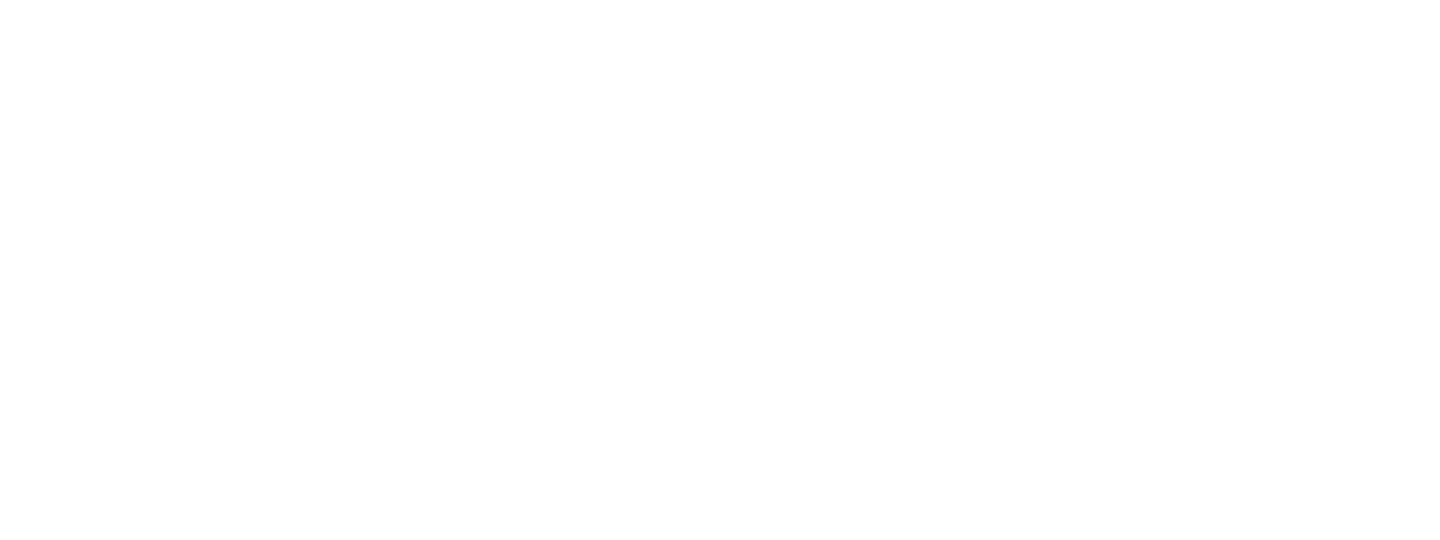

In [26]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.patches import Rectangle, Arrow, FancyArrow

def f_p1(t, a):
    t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return [p1_data[int(j)]['position'][0] for j in t_partial], [p1_data[int(j)]['position'][1] for j in t_partial]
def f_p2(t, a):
    t_partial = t[int(a)-1:int(a)+1]
    return [p2_data[int(j)]['position'][0] for j in t_partial], [p2_data[int(j)]['position'][1] for j in t_partial]


def arrow_p1(t, a):
#     t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1],\
            p1_data[int(a)]['orientation'][0], p1_data[int(a)]['orientation'][1]
def arrow_p2(t, a):
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
            p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]

# global arrow1 
# global arrow2 
# arrow1 = None
# arrow2 = None

a_min = 1    # the minimial value of the paramater a
a_max = N_steps-1   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

t = np.linspace(0, N_steps-1, N_steps)

fig = plt.figure(figsize=(8,3))
# fig, ax = plt.subplots(1,1)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# arrow = FancyArrow(arrow_p1(t, a_init)[0], arrow_p1(t, a_init)[1], 
#                    arrow_p1(t, a_init)[2], arrow_p1(t, a_init)[3], head_width=0.5,
#                    head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)

# a = ax.add_patch(arrow)

# name = 'cramped_room'
# title = 'Cramped Room'
name = 'random0'
title = 'Forced Coordination'
layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
layout = np.array([list(elem) for elem in layout])
grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
for i in range(layout.shape[0]):
    for j in range(layout.shape[1]):
        # Floor = gray
        grid_display[i,j,:] = [220,220,220]
        if layout[i,j] == 'X':
            # Counter = Tan
            grid_display[i,j,:] = [210,180,140]
        if layout[i,j] == 'P':
            # Pots = brown
            grid_display[i,j,:] = [139,69,19]
        if layout[i,j] == 'S':
            # Serve = Green
            grid_display[i,j,:] = [34,139,34]
        if layout[i,j] == 'O':
            # Onion = Yellow
            grid_display[i,j,:] = [218,165,32]
        if layout[i,j] == 'D':
            # Dishes = Blue
            grid_display[i,j,:] = [65,105,225]
        if layout[i,j] == 'T':
            # Tomato = Red
            grid_display[i,j,:] = [255,0,0]



# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])

ax = plt.axes(sin_ax) # select sin_ax

plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)


scat1 = plt.scatter(f_p1(t, a_init)[0], f_p1(t, a_init)[1], lw=20, c='r')
line1, = plt.plot(f_p1(t, a_init)[0], f_p1(t, a_init)[1], lw=20, c='r')

arrow1 = plt.arrow(arrow_p1(t, a_init)[0], arrow_p1(t, a_init)[1], 
                   arrow_p1(t, a_init)[2], arrow_p1(t, a_init)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)
# arrow = FancyArrow(arrow_p1(t, a_init)[0], arrow_p1(t, a_init)[1], 
#                    arrow_p1(t, a_init)[2], arrow_p1(t, a_init)[3], head_width=0.5,
#                    head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)

ax.add_patch(arrow1)

scat2 = plt.scatter(f_p2(t, a_init)[0], f_p2(t, a_init)[1], lw=20, c='b')
line2, = plt.plot(f_p2(t, a_init)[0], f_p2(t, a_init)[1], lw=20, c='b')

arrow2 = plt.arrow(arrow_p2(t, a_init)[0], arrow_p2(t, a_init)[1], 
                   arrow_p2(t, a_init)[2], arrow_p2(t, a_init)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='b', ec='b', length_includes_head=True)
ax.add_patch(arrow2)
# plt.xlim(0, 5)
# plt.ylim(0, 5)

# here we create the slider
a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'time',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init,  # initial value of the parameter
#                   markerprops=dict(marker='o', markersize=7)
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(a):
    line1.set_xdata(f_p1(t, a)[0])
    line1.set_ydata(f_p1(t, a)[1])
    line2.set_xdata(f_p2(t, a)[0])
    line2.set_ydata(f_p2(t, a)[1])
    
    data_in_1 = np.array([f_p1(t, a)[0], f_p1(t, a)[1]]).T
    data_in_2 = np.array([f_p2(t, a)[0], f_p2(t, a)[1]]).T
    scat1.set_offsets(data_in_1)
    scat2.set_offsets(data_in_2)
    
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 

    arrow1 = plt.arrow(arrow_p1(t, a)[0], arrow_p1(t, a)[1], 
               arrow_p1(t, a)[2], arrow_p1(t, a)[3], head_width=0.5,
               head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)
    ax.add_patch(arrow1)
    
    arrow2 = plt.arrow(arrow_p2(t, a)[0], arrow_p2(t, a)[1], 
                   arrow_p2(t, a)[2], arrow_p2(t, a)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='b', ec='b', length_includes_head=True)
    ax.add_patch(arrow2)
    
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)

plt.show()


In [27]:
for i in range(1, len(p1_data)):
    if 'orientation' not in p1_data[i]:
        print(p1_data[i])

In [28]:
for i in range(1, len(p2_data)):
    if 'orientation' not in p2_data[i]:
        print(p2_data[i])

# Take a look at world data

In [29]:
layout_trials = old_trials[old_trials['layout_name']=='random0']['trial_id'].unique()

# for j in range(len(layout_trials)):
for j in [-1]:
    trial_id = layout_trials[j]
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    state_data_eval = []
    objects_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
        state_data_eval.append(state_x)
        objects_data.append(state_x['objects'])
    

In [30]:
objects_data

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'name': 'onion', 'position': [2, 3]}],
 [{'name': 'onion', 'position': [2, 3]}],
 [{'name': 'onion', 'position': [2, 3]}],
 [{'name': 'onion', 'position': [2, 3]}],
 [{'name': 'onion', 'position': [2, 3]}],
 [{'name': 'onion', 'position': [2, 3]}],
 [{'name': 'onion', 'position': [2, 3]}],
 [{'name': 'onion', 'position': [2, 3]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'name': 'onion', 'position': [2, 2]}],
 [{'name': 'onion', 'position': [2, 2]}],
 [{'name': 'onion', 'position': [2, 2]}],
 [{'name': 'onion', 'position': [2, 2]}],
 [{'name': 'onion', 'position': [2, 2]}],
 [{'name': 'soup',
   'position': [4, 1],
   '_ingredients': [{'name': 'onion', 'position': [4, 1]}],
   'cooking_tick': -1,
   'is_cooking': False,
   'is_ready': False,
   

<IPython.core.display.Javascript object>


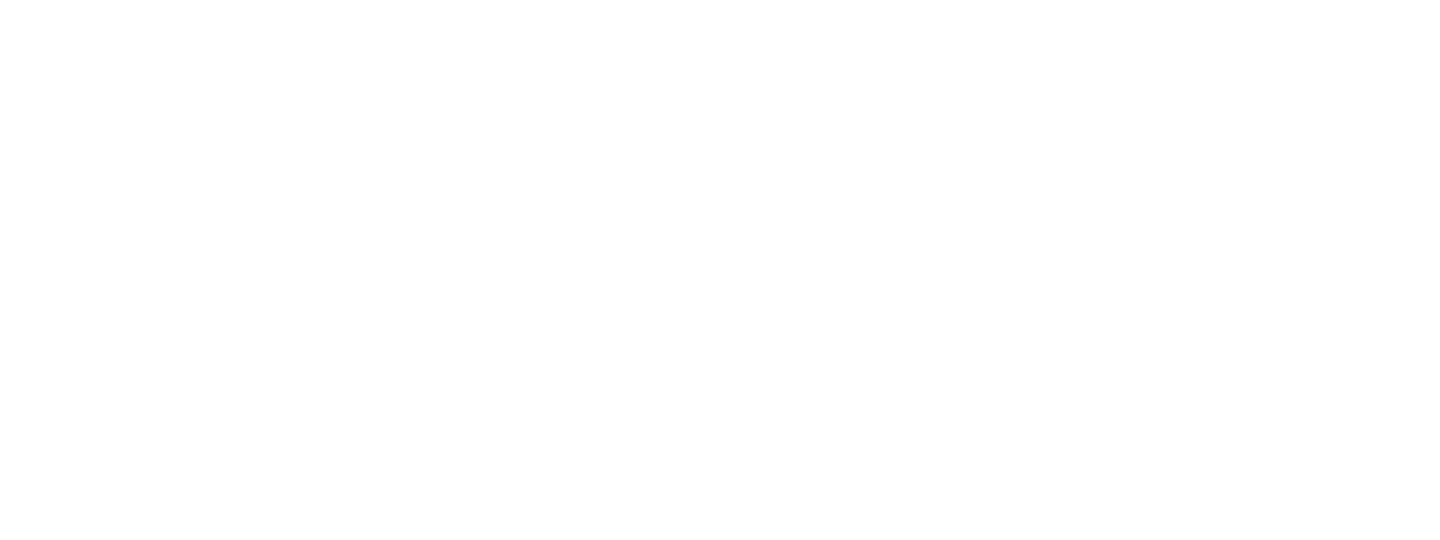

In [31]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.patches import Rectangle, Arrow, FancyArrow

def f_p1(t, a):
    t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return [p1_data[int(j)]['position'][0] for j in t_partial], [p1_data[int(j)]['position'][1] for j in t_partial]
def f_p2(t, a):
    t_partial = t[int(a)-1:int(a)+1]
    return [p2_data[int(j)]['position'][0] for j in t_partial], [p2_data[int(j)]['position'][1] for j in t_partial]


def arrow_p1(t, a):
#     t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1],\
            p1_data[int(a)]['orientation'][0], p1_data[int(a)]['orientation'][1]
def arrow_p2(t, a):
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
            p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]

def obj_p1(t, a):
#     t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    color = 'b'
    if p1_data[int(a)]['held_object'] is None:
        return [None, None, None, None]
    else:
        name = p1_data[int(a)]['held_object']['name']
        if name == 'dish':
            color = 'b'
        elif name == 'onion':
            color = 'o'
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1], p1_data[int(a)]['held_object']['name'], color

def obj_p2(t, a):
    color = 'b'
    if p2_data[int(a)]['held_object'] is None:
        return [None, None, None, None]
    else:
        name = p2_data[int(a)]['held_object']['name']
        if name == 'dish':
            color = 'b'
        elif name == 'onion':
            color = 'o'
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1], p2_data[int(a)]['held_object']['name'], color

# def obj_both(t, a):
#     return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
#             p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]


# global arrow1 
# global arrow2 
# arrow1 = None
# arrow2 = None

a_min = 1    # the minimial value of the paramater a
a_max = N_steps-1   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

t = np.linspace(0, N_steps-1, N_steps)

fig = plt.figure(figsize=(8,3))
# fig, ax = plt.subplots(1,1)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# arrow = FancyArrow(arrow_p1(t, a_init)[0], arrow_p1(t, a_init)[1], 
#                    arrow_p1(t, a_init)[2], arrow_p1(t, a_init)[3], head_width=0.5,
#                    head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)

# a = ax.add_patch(arrow)

# name = 'cramped_room'
# title = 'Cramped Room'
name = 'random0'
title = 'Forced Coordination'
layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
layout = np.array([list(elem) for elem in layout])
grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
for i in range(layout.shape[0]):
    for j in range(layout.shape[1]):
        # Floor = gray
        grid_display[i,j,:] = [220,220,220]
        if layout[i,j] == 'X':
            # Counter = Tan
            grid_display[i,j,:] = [210,180,140]
        if layout[i,j] == 'P':
            # Pots = brown
            grid_display[i,j,:] = [139,69,19]
        if layout[i,j] == 'S':
            # Serve = Green
            grid_display[i,j,:] = [34,139,34]
        if layout[i,j] == 'O':
            # Onion = Yellow
            grid_display[i,j,:] = [218,165,32]
        if layout[i,j] == 'D':
            # Dishes = Blue
            grid_display[i,j,:] = [65,105,225]
        if layout[i,j] == 'T':
            # Tomato = Red
            grid_display[i,j,:] = [255,0,0]



# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
global p1_hold
global p2_hold
p1_hold, p2_hold = False, False

sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])

ax = plt.axes(sin_ax) # select sin_ax

plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)

# if obj_p1(t, a_init)[0] is not None:
#     p1_hold = True
#     scat_obj1 = plt.scatter(obj_p1(t, a_init)[0], obj_p1(t, a_init)[1], lw=50, c=obj_p1(t, a_init)[3])

scat1 = plt.scatter(f_p1(t, a_init)[0], f_p1(t, a_init)[1], lw=20, c='r')
line1, = plt.plot(f_p1(t, a_init)[0], f_p1(t, a_init)[1], lw=20, c='r')

arrow1 = plt.arrow(arrow_p1(t, a_init)[0], arrow_p1(t, a_init)[1], 
                   arrow_p1(t, a_init)[2], arrow_p1(t, a_init)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)
ax.add_patch(arrow1)

if obj_p1(t, a_init)[0] is not None:
    arrow_obj1 = plt.arrow(obj_p1(t, a_init)[0], obj_p1(t, a_init)[1], 
                       0, 1, head_width=0.5,
                       head_length=0.1, width=0.2, fc=obj_p1(t, a_init)[3], ec=obj_p1(t, a_init)[3], length_includes_head=True)
    ax.add_patch(arrow_obj1)

scat2 = plt.scatter(f_p2(t, a_init)[0], f_p2(t, a_init)[1], lw=20, c='b')
line2, = plt.plot(f_p2(t, a_init)[0], f_p2(t, a_init)[1], lw=20, c='b')

arrow2 = plt.arrow(arrow_p2(t, a_init)[0], arrow_p2(t, a_init)[1], 
                   arrow_p2(t, a_init)[2], arrow_p2(t, a_init)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='b', ec='b', length_includes_head=True)
ax.add_patch(arrow2)
# plt.xlim(0, 5)
# plt.ylim(0, 5)

# here we create the slider
a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'time',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init,  # initial value of the parameter
#                   markerprops=dict(marker='o', markersize=7)
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(a):
    line1.set_xdata(f_p1(t, a)[0])
    line1.set_ydata(f_p1(t, a)[1])
    line2.set_xdata(f_p2(t, a)[0])
    line2.set_ydata(f_p2(t, a)[1])
    
    data_in_1 = np.array([f_p1(t, a)[0], f_p1(t, a)[1]]).T
    data_in_2 = np.array([f_p2(t, a)[0], f_p2(t, a)[1]]).T
    scat1.set_offsets(data_in_1)
    scat2.set_offsets(data_in_2)
    
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 
#     ax.patches.pop(-1) 
#     ax.patches.pop(-1)
#     if p1_hold is True:
#         p1_hold = False
#         ax.patches.pop(-1)
#         ax.patches.pop(-1)

    arrow1 = plt.arrow(arrow_p1(t, a)[0], arrow_p1(t, a)[1], 
               arrow_p1(t, a)[2], arrow_p1(t, a)[3], head_width=0.5,
               head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)
    ax.add_patch(arrow1)
    
    
    
    arrow2 = plt.arrow(arrow_p2(t, a)[0], arrow_p2(t, a)[1], 
                   arrow_p2(t, a)[2], arrow_p2(t, a)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='b', ec='b', length_includes_head=True)
    ax.add_patch(arrow2)
    
#     if obj_p1(t, a)[0] is not None:
#         p1_hold = True
#         arrow_obj1 = plt.arrow(obj_p1(t, a)[0], obj_p1(t, a)[1], 
#                            0, 1, head_width=0.5,
#                            head_length=0.1, width=0.2, fc=obj_p1(t, a)[3], ec=obj_p1(t, a)[3], length_includes_head=True)
#         ax.add_patch(arrow_obj1)
    
    
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)

plt.show()


In [32]:
p2_data

[{'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [0, -1], 'held_object': None},
 {'position': [1, 2], 'orientation': [-1, 0], 'held_object': None},
 {'position': [1, 2], 'orientation': [-1, 0], 'held_object': None},
 {'position': [1, 2],
  'orientation': [-1, 0],
  'held_object': {'name': 'onion', 'position': [1, 2]}},
 {'position

# Replay with Holding Objects

<IPython.core.display.Javascript object>


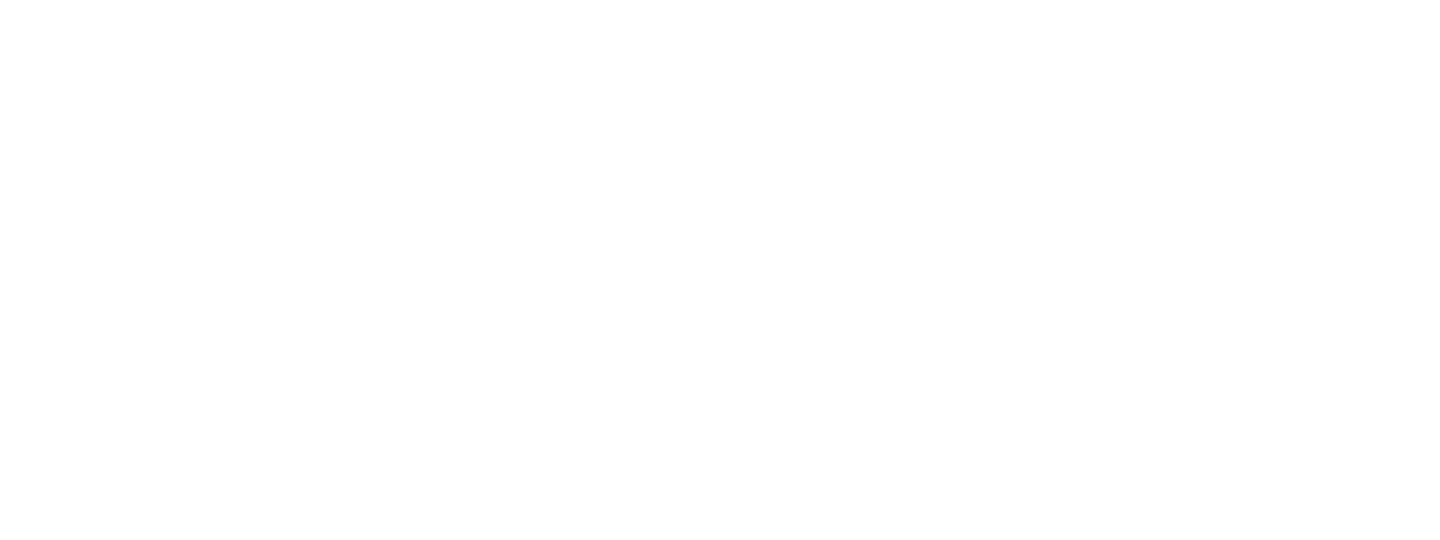

In [33]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.patches import Rectangle, Arrow, FancyArrow

def f_p1(t, a):
    t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return [p1_data[int(j)]['position'][0] for j in t_partial], [p1_data[int(j)]['position'][1] for j in t_partial]
def f_p2(t, a):
    t_partial = t[int(a)-1:int(a)+1]
    return [p2_data[int(j)]['position'][0] for j in t_partial], [p2_data[int(j)]['position'][1] for j in t_partial]



def arrow_p1(t, a):
#     t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1],\
            p1_data[int(a)]['orientation'][0], p1_data[int(a)]['orientation'][1]
def arrow_p2(t, a):
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
            p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]


def held_p1(t, a):
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1],\
            p1_data[int(a)]['orientation'][0], p1_data[int(a)]['orientation'][1]
def held_p2(t, a):
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
            p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]



a_min = 1    # the minimial value of the paramater a
a_max = N_steps-1   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

t = np.linspace(0, N_steps-1, N_steps)

fig = plt.figure(figsize=(8,3))
# fig, ax = plt.subplots(1,1)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# arrow = FancyArrow(arrow_p1(t, a_init)[0], arrow_p1(t, a_init)[1], 
#                    arrow_p1(t, a_init)[2], arrow_p1(t, a_init)[3], head_width=0.5,
#                    head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)

# a = ax.add_patch(arrow)

name = 'cramped_room'
title = 'Cramped Room'
layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
layout = np.array([list(elem) for elem in layout])
grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
for i in range(layout.shape[0]):
    for j in range(layout.shape[1]):
        # Floor = gray
        grid_display[i,j,:] = [220,220,220]
        if layout[i,j] == 'X':
            # Counter = Tan
            grid_display[i,j,:] = [210,180,140]
        if layout[i,j] == 'P':
            # Pots = brown
            grid_display[i,j,:] = [139,69,19]
        if layout[i,j] == 'S':
            # Serve = Green
            grid_display[i,j,:] = [34,139,34]
        if layout[i,j] == 'O':
            # Onion = Yellow
            grid_display[i,j,:] = [218,165,32]
        if layout[i,j] == 'D':
            # Dishes = Blue
            grid_display[i,j,:] = [65,105,225]
        if layout[i,j] == 'T':
            # Tomato = Blue
            grid_display[i,j,:] = [255,69,0]



# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])

ax = plt.axes(sin_ax) # select sin_ax

plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)


scat1 = plt.scatter(f_p1(t, a_init)[0], f_p1(t, a_init)[1], lw=20, c='r')
line1, = plt.plot(f_p1(t, a_init)[0], f_p1(t, a_init)[1], lw=20, c='r')

arrow1 = plt.arrow(arrow_p1(t, a_init)[0], arrow_p1(t, a_init)[1], 
                   arrow_p1(t, a_init)[2], arrow_p1(t, a_init)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)
# arrow = FancyArrow(arrow_p1(t, a_init)[0], arrow_p1(t, a_init)[1], 
#                    arrow_p1(t, a_init)[2], arrow_p1(t, a_init)[3], head_width=0.5,
#                    head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)

ax.add_patch(arrow1)

scat2 = plt.scatter(f_p2(t, a_init)[0], f_p2(t, a_init)[1], lw=20, c='b')
line2, = plt.plot(f_p2(t, a_init)[0], f_p2(t, a_init)[1], lw=20, c='b')

arrow2 = plt.arrow(arrow_p2(t, a_init)[0], arrow_p2(t, a_init)[1], 
                   arrow_p2(t, a_init)[2], arrow_p2(t, a_init)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='b', ec='b', length_includes_head=True)
ax.add_patch(arrow2)
# plt.xlim(0, 5)
# plt.ylim(0, 5)

# here we create the slider
a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'time',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init,  # initial value of the parameter
#                   markerprops=dict(marker='o', markersize=7)
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(a):
    line1.set_xdata(f_p1(t, a)[0])
    line1.set_ydata(f_p1(t, a)[1])
    line2.set_xdata(f_p2(t, a)[0])
    line2.set_ydata(f_p2(t, a)[1])
    
    data_in_1 = np.array([f_p1(t, a)[0], f_p1(t, a)[1]]).T
    data_in_2 = np.array([f_p2(t, a)[0], f_p2(t, a)[1]]).T
    scat1.set_offsets(data_in_1)
    scat2.set_offsets(data_in_2)
    
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 
    ax.patches.pop(-1) 

    arrow1 = plt.arrow(arrow_p1(t, a)[0], arrow_p1(t, a)[1], 
               arrow_p1(t, a)[2], arrow_p1(t, a)[3], head_width=0.5,
               head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)
    ax.add_patch(arrow1)
    
    arrow2 = plt.arrow(arrow_p2(t, a)[0], arrow_p2(t, a)[1], 
                   arrow_p2(t, a)[2], arrow_p2(t, a)[3], head_width=0.5,
                   head_length=0.5, width=0.02, fc='b', ec='b', length_includes_head=True)
    ax.add_patch(arrow2)
    
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)

plt.show()



# Curr: Plot as Series of Images

In [19]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.patches import Rectangle, Arrow, FancyArrow


# N_steps = len(p2_data)
# a_min = 1    # the minimial value of the paramater a
# a_max = N_steps-1   # the maximal value of the paramater a
# a_init = 1   # the value of the parameter a to be used initially, when the graph is created

# t = np.linspace(1, N_steps-1, N_steps-1)


def f_p1(t, a, p1_data):
    t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return [p1_data[int(j)]['position'][0] for j in t_partial], [p1_data[int(j)]['position'][1] for j in t_partial]
def f_p2(t, a, p2_data):
    t_partial = t[int(a)-1:int(a)+1]
    return [p2_data[int(j)]['position'][0] for j in t_partial], [p2_data[int(j)]['position'][1] for j in t_partial]



def arrow_p1(t, a, p1_data):
#     t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1],\
            p1_data[int(a)]['orientation'][0], p1_data[int(a)]['orientation'][1]
def arrow_p2(t, a, p2_data):
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
            p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]


def held_p1(t, a, p1_data):
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1],\
            p1_data[int(a)]['orientation'][0], p1_data[int(a)]['orientation'][1]
def held_p2(t, a, p2_data):
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1],\
            p2_data[int(a)]['orientation'][0], p2_data[int(a)]['orientation'][1]


def world_obj(t, a, objects_data):
    obj_world = objects_data[int(a)]
    if len(obj_world)==0:
        return []
    objects_list = []
    for i in range(len(obj_world)):
        obj = obj_world[i]
        name = obj_world[i]['name']
        position = obj_world[i]['position']
        if name == 'onion':
            color = 'y'
            objects_list.append((position[0], position[1], color))
        if name == 'dish':
            color = 'k'
            objects_list.append((position[0], position[1], color))
        if name == 'soup':
            if obj['is_cooking'] is True:
                color = 'r'
            elif obj['is_ready'] is True:
                color = 'g'
            else:
                color = 'orange'
            objects_list.append((position[0], position[1], color))
        
    return objects_list


def obj_p1(t, a, p1_data):
#     t_partial = t[int(a)-1:int(a)+1]
#     print('t_input', t)
    color = 'k'
    if p1_data[int(a)]['held_object'] is None:
        return [None, None, None, None]
    else:
        name = p1_data[int(a)]['held_object']['name']
        if name == 'dish':
            color = 'k'
        elif name == 'onion':
            color = 'y'
    return p1_data[int(a)]['position'][0], p1_data[int(a)]['position'][1], p1_data[int(a)]['held_object']['name'], color

def obj_p2(t, a, p2_data):
    color = 'k'
    if p2_data[int(a)]['held_object'] is None:
        return [None, None, None, None]
    else:
        name = p2_data[int(a)]['held_object']['name']
        if name == 'dish':
            color = 'k'
        elif name == 'onion':
            color = 'y'
    return p2_data[int(a)]['position'][0], p2_data[int(a)]['position'][1], p2_data[int(a)]['held_object']['name'], color


# [{'name': 'soup',
#    'position': [4, 1],
#    '_ingredients': [{'name': 'onion', 'position': [4, 1]},
#     {'name': 'onion', 'position': [4, 1]}],
#    'cooking_tick': -1,
#    'is_cooking': False,
#    'is_ready': False,
#    'is_idle': True,
#    'cook_time': -1,
#    '_cooking_tick': -1}],



In [20]:

def plot_trial(trial_id, p1_data, p2_data, objects_data, name, title):
        
    N_steps = len(p1_data)
    a_min = 1    # the minimial value of the paramater a
    a_max = N_steps-1   # the maximal value of the paramater a
    a_init = 1   # the value of the parameter a to be used initially, when the graph is created

    t = np.linspace(0, N_steps-1, N_steps)
    
    
    layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
    layout = np.array([list(elem) for elem in layout])
    grid_display = np.zeros((layout.shape[0], layout.shape[1], 3))
    for i in range(layout.shape[0]):
        for j in range(layout.shape[1]):
            # Floor = gray
            grid_display[i,j,:] = [220,220,220]
            if layout[i,j] == 'X':
                # Counter = Tan
                grid_display[i,j,:] = [91,153,91]
            if layout[i,j] == 'P':
                # Pots = brown
                grid_display[i,j,:] = [139,69,19]
            if layout[i,j] == 'S':
                # Serve = Green
                grid_display[i,j,:] = [34,139,34]
            if layout[i,j] == 'O':
                # Onion = Yellow
                grid_display[i,j,:] = [218,165,32]
            if layout[i,j] == 'D':
                # Dishes = Blue
                grid_display[i,j,:] = [65,105,225]
            if layout[i,j] == 'T':
                # Tomato = Blue
                grid_display[i,j,:] = [255,69,0]


    # loop over your images
    for a in range(len(t)):

        fig = plt.figure(figsize=(8,3))

        sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])

        plt.axes(sin_ax) # select sin_ax

        plt.imshow(grid_display.astype(np.uint8), vmin=0, vmax=255)


        scat1 = plt.scatter(f_p1(t, a, p1_data)[0], f_p1(t, a, p1_data)[1], lw=20, c='r')
        line1, = plt.plot(f_p1(t, a, p1_data)[0], f_p1(t, a, p1_data)[1], lw=5, c='r')

        arrow1 = plt.arrow(arrow_p1(t, a, p1_data)[0], arrow_p1(t, a, p1_data)[1], 
                           arrow_p1(t, a, p1_data)[2], arrow_p1(t, a, p1_data)[3], head_width=0.5,
                           head_length=0.5, width=0.02, fc='r', ec='r', length_includes_head=True)

        if obj_p1(t, a, p1_data)[0] is not None:
            arrow_obj1 = plt.scatter(obj_p1(t, a, p1_data)[0], obj_p1(t, a, p1_data)[1], 
                                     lw=10, c=obj_p1(t, a, p1_data)[3])


        scat2 = plt.scatter(f_p2(t, a, p2_data)[0], f_p2(t, a, p2_data)[1], lw=20, c='b')
        line2, = plt.plot(f_p2(t, a, p2_data)[0], f_p2(t, a, p2_data)[1], lw=5, c='b')

        arrow2 = plt.arrow(arrow_p2(t, a, p2_data)[0], arrow_p2(t, a, p2_data)[1], 
                           arrow_p2(t, a, p2_data)[2], arrow_p2(t, a, p2_data)[3], head_width=0.5,
                           head_length=0.5, width=0.02, fc='b', ec='b', length_includes_head=True)

        if obj_p2(t, a, p2_data)[0] is not None:
            arrow_obj2 = plt.scatter(obj_p2(t, a, p2_data)[0], obj_p2(t, a, p2_data)[1], 
                                     lw=10, c=obj_p2(t, a, p2_data)[3])

        objects_list = world_obj(t, a, objects_data)
        for obj in objects_list:
            obj_add = plt.scatter(obj[0], obj[1], 
                                     lw=10, c=obj[2])

        trial_name = name + '_'+str(trial_id)
        if not os.path.exists(trial_name):
            os.makedirs(trial_name)

        plt.savefig(trial_name+'/im_'+str(a)+'.png')
        plt.close()


In [21]:
old_trials['layout_name'].unique()

array(['cramped_room', 'asymmetric_advantages', 'coordination_ring',
       'random3', 'random0'], dtype=object)

In [114]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os

# Use Agg backend for canvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


layout_trials = old_trials[old_trials['layout_name']=='random0']['trial_id'].unique()
name = 'random0'
title = 'Forced Coordination'

for j in range(len(layout_trials)):
# for j in [1]:
    trial_id = layout_trials[j]
    print('trial_id', trial_id)
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    state_data_eval = []
    objects_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
        state_data_eval.append(state_x)
        objects_data.append(state_x['objects'])
    plot_trial(trial_id, p1_data, p2_data, objects_data, name, title)


trial_id 9
trial_id 14
trial_id 19
trial_id 24
trial_id 54
trial_id 59
trial_id 64
trial_id 69
trial_id 79
trial_id 89
trial_id 99
trial_id 114


In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os

# Use Agg backend for canvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

name = 'random3'
title = 'Counter Circuit'
layout_trials = old_trials[old_trials['layout_name']==name]['trial_id'].unique()


for j in range(len(layout_trials)):
# for j in [1]:
    trial_id = layout_trials[j]
    print('trial_id', trial_id)
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    state_data_eval = []
    objects_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
        state_data_eval.append(state_x)
        objects_data.append(state_x['objects'])
    plot_trial(trial_id, p1_data, p2_data, objects_data, name, title)


trial_id 8
trial_id 13
trial_id 18
trial_id 23
trial_id 33
trial_id 48
trial_id 53
trial_id 58
trial_id 63
trial_id 68
trial_id 73
trial_id 78
trial_id 83
trial_id 88
trial_id 93
trial_id 98
trial_id 103
trial_id 113


In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os

# Use Agg backend for canvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


layout_trials = old_trials[old_trials['layout_name']=='random0']['trial_id'].unique()
name = 'asymmetric_advantages'
title = 'Asymmetric Advantages'

for j in range(len(layout_trials)):
# for j in [1]:
    trial_id = layout_trials[j]
    print('trial_id', trial_id)
    score = old_trials[old_trials['trial_id']==trial_id]['score'].to_numpy()[-1]
    score_total = old_trials[old_trials['trial_id']==trial_id]['reward'].to_numpy()[-1]
    print('score', score)
    print('score_total', score_total)
    print()


trial_id 9
score 95.0
score_total 0.0

trial_id 14
score 120.0
score_total 0.0

trial_id 19
score 90.0
score_total 0.0

trial_id 24
score 70.0
score_total 0.0

trial_id 54
score 110.0
score_total 0.0

trial_id 59
score 100.0
score_total 0.0

trial_id 64
score 40.0
score_total 0.0

trial_id 69
score 75.0
score_total 0.0

trial_id 79
score 65.0
score_total 0.0

trial_id 89
score 75.0
score_total 0.0

trial_id 99
score 100.0
score_total 0.0

trial_id 114
score 75.0
score_total 0.0



In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os

# Use Agg backend for canvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# layout_names = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
#        'random3', 'random0']
# layout_titles = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
#        'counter_circuit', 'forced_coordination']

name = 'cramped_room'
title = 'Cramped Room'
layout_trials = old_trials[old_trials['layout_name']==name]['trial_id'].unique()


for j in range(len(layout_trials)):
# for j in [1]:
    trial_id = layout_trials[j]
    print('trial_id', trial_id)
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    state_data_eval = []
    objects_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
        state_data_eval.append(state_x)
        objects_data.append(state_x['objects'])
    plot_trial(trial_id, p1_data, p2_data, objects_data, name, title)


trial_id 0
trial_id 5
trial_id 10
trial_id 15
trial_id 20
trial_id 45
trial_id 50
trial_id 55
trial_id 60
trial_id 65
trial_id 70
trial_id 75
trial_id 80
trial_id 85
trial_id 90
trial_id 95
trial_id 100
trial_id 110
trial_id 115


In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os

# Use Agg backend for canvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# layout_names = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
#        'random3', 'random0']
# layout_titles = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
#        'counter_circuit', 'forced_coordination']
name = 'asymmetric_advantages'
title = 'Asymmetric Advantages'
layout_trials = old_trials[old_trials['layout_name']==name]['trial_id'].unique()


for j in range(len(layout_trials)):
# for j in [1]:
    trial_id = layout_trials[j]
    print('trial_id', trial_id)
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    state_data_eval = []
    objects_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
        state_data_eval.append(state_x)
        objects_data.append(state_x['objects'])
    plot_trial(trial_id, p1_data, p2_data, objects_data, name, title)


trial_id 6
trial_id 11
trial_id 16
trial_id 21
trial_id 31
trial_id 46
trial_id 51
trial_id 56
trial_id 61
trial_id 66
trial_id 71
trial_id 76
trial_id 81
trial_id 86
trial_id 91
trial_id 96
trial_id 101
trial_id 111
trial_id 116


In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os

# Use Agg backend for canvas
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# layout_names = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
#        'random3', 'random0']
# layout_titles = ['cramped_room', 'asymmetric_advantages', 'coordination_ring',
#        'counter_circuit', 'forced_coordination']

name = 'coordination_ring'
title = 'Coordination Ring'
layout_trials = old_trials[old_trials['layout_name']==name]['trial_id'].unique()


for j in range(len(layout_trials)):
# for j in [1]:
    trial_id = layout_trials[j]
    print('trial_id', trial_id)
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    state_data_eval = []
    objects_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
        state_data_eval.append(state_x)
        objects_data.append(state_x['objects'])
    plot_trial(trial_id, p1_data, p2_data, objects_data, name, title)

    

trial_id 7
trial_id 12
trial_id 17
trial_id 22
trial_id 47
trial_id 52
trial_id 57
trial_id 62
trial_id 67
trial_id 72
trial_id 77
trial_id 82
trial_id 87
trial_id 92
trial_id 97
trial_id 102
trial_id 112
trial_id 117


In [111]:
a

299

# Figure out directions of Turning

In [35]:
layout_trials = old_trials[old_trials['layout_name']=='cramped_room']['trial_id'].unique()


In [36]:
layout_trials

array([  0,   5,  10,  15,  20,  45,  50,  55,  60,  65,  70,  75,  80,
        85,  90,  95, 100, 110, 115])

In [37]:
def compute_steps(p_data):
    n_steps = 0
    prev_loc = (p_data[0]['position'][1], p_data[0]['position'][0])
    for i in range(1, len(p_data)):
        new_loc = (p_data[i]['position'][1], p_data[i]['position'][0])
        if new_loc != prev_loc:
            n_steps += 1
            prev_loc = new_loc
    return n_steps
    
    
    

In [38]:
def compute_number_objects_picked(p_data):
    n_obj = 0
    objects = False
    for i in range(0, len(p_data)):
        new_loc = (p_data[i]['position'][1], p_data[i]['position'][0])
    
        if 'held_object' in p_data[i]:
            
#             print('found')
            if p_data[i]['held_object'] is not None and objects is False:
                if p_data[i]['held_object']['name']!='dish':
                    continue
                objects = True
                n_obj += 1

            if p_data[i]['held_object'] is None and objects is True:
#                 if p_data[i]['held_object']['name']!='onion':
#                     continue
                objects = False
#             n_obj += 1
    return n_obj
    

In [39]:
num_steps_all_players = []
for j in range(len(layout_trials)):
    trial_id = layout_trials[j]
    trial_df = old_trials[old_trials['trial_id']==trial_id]
    state_data = trial_df['state'].to_numpy()
    p1_data = []
    p2_data = []
    for i in range(1, len(state_data)):
        prev_state_x = json_eval(state_data[i-1])
        state_x = json_eval(state_data[i])
        p1_data.append(state_x['players'][0])
        p2_data.append(state_x['players'][1])
    
    p1_steps = compute_steps(p1_data)
    p2_steps = compute_steps(p2_data)
    num_steps_all_players.append(p1_steps)
    num_steps_all_players.append(p2_steps)
    

    
    

In [40]:
layout_name = 'Counter Circuit'
plt.hist(num_steps_all_players, bins=15)
plt.title("Histogram of Number of Player Steps in Layout: " + layout_name)
plt.show()

In [41]:
for i in range(len(layout_names)):
    name = layout_names[i]
    title = layout_titles[i]
    layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
    layout_trials = old_trials[old_trials['layout_name']==name]['trial_id'].unique()

    num_steps_all_players = []
    for j in range(len(layout_trials)):
        trial_id = layout_trials[j]
        trial_df = old_trials[old_trials['trial_id']==trial_id]
        state_data = trial_df['state'].to_numpy()
        p1_data = []
        p2_data = []
        for i in range(1, len(state_data)):
            prev_state_x = json_eval(state_data[i-1])
            state_x = json_eval(state_data[i])
            p1_data.append(state_x['players'][0])
            p2_data.append(state_x['players'][1])

        p1_steps = compute_number_objects_picked(p1_data)
        p2_steps = compute_number_objects_picked(p2_data)
        num_steps_all_players.append(p1_steps)
        num_steps_all_players.append(p2_steps)

#     layout_name = 'Counter Circuit'
    plt.hist(num_steps_all_players, bins=15)
    plt.title("Histogram of Number of Player Times Held Dish: " + title)
    plt.show()
    
    
    

In [42]:
name = 'cramped_room'
title = 'cramped_room'
layout = eval(old_trials[old_trials['layout_name']==name]['layout'].to_numpy()[0])
layout = np.array([list(elem) for elem in layout])
display_layout(layout, title)

# plt.figure()
plt.plot(p2_data[:]['position'][1], p2_data[:]['position'][0])
plt.show()
    

TypeError: list indices must be integers or slices, not str

In [ ]:
trial_df.columns

In [ ]:
state_data = trial_df['state'].to_numpy()

In [ ]:
counter = 0
for i in range(1, len(state_data)):
    prev_state_x = json_eval(state_data[i-1])
    state_x = json_eval(state_data[i])
    p1_data = state_x['players'][0]
    p2_data = state_x['players'][1]
    
    if p1_data['held_object'] is not None:
        print('previous 1 location:::', prev_state_x['players'][0])
        print('p1_data:::', p1_data)
        print()
        counter += 1
        if counter > 20:
            break
    
    if p2_data['held_object'] is not None:
        print('previous 2 location:::', prev_state_x['players'][1])
        print('p2_data:::', p2_data)
        print()
        counter += 1
        if counter > 20:
            break
    
    
    

In [ ]:
for i in range(len(state_data)):
    state_x = json_eval(state_data[i])
    p1_data = state_x['players'][0]
    p2_data = state_x['players'][1]
    objects = state_x['objects']
    if objects['is_ready'] is True:
        print('state_x', state_x)
        break
    
    
    
    
    

In [ ]:
for i in range(len(state_data)):
    state_x = json_eval(state_data[i])
    objects = state_x['objects']
    if len(objects) == 2:
        print((objects))
#     print(state_x['objects'])
    

## Orientations Mapping

## Positions = (x,y)

1. 'orientation': [0, 1] = South
2. 'orientation': [-1, 0] = West
3. 'orientation': [1, 0] = East
4. 'orientation': [0, -1] = North
